In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model_best = load_model(r'C:\Users\dsilv\development\Emotion\face_model.h5') # set your machine model file path here

# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load the pre-trained face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion_label = class_names[np.argmax(predictions)]

        # Display the emotion label on the frame
        cv2.putText(frame, f'Emotion: {emotion_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

C:\Users\dsilv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 

In [25]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_emotion(image_path, model_path=r'C:\Users\dsilv\development\Emotion\cnn_emotion_detection.h5'):
    # Load the saved model
    model = load_model(model_path)
    
    # Load and preprocess the image
    img = load_img(image_path, color_mode="grayscale", target_size=(48, 48))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the emotion
    predictions = model.predict(img_array)
    emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
    predicted_emotion = emotion_labels[np.argmax(predictions)]
    
    return predicted_emotion

# Test the model with a user-provided image
image_path = r'C:\Users\dsilv\development\Emotion\Testing\1.jpg'
predicted_emotion = predict_emotion(image_path)
print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Emotion: Surprise


https://www.kaggle.com/models/vinitvyas09/cnn_model_emotion_classification

In [47]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load the model
model = load_model(r'C:\Users\dsilv\development\Emotion\cnn_emotion_detection.h5')

# Define the emotion labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Function to preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    return img

# Function to predict emotion
def predict_emotion(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    emotion_index = np.argmax(prediction)
    emotion = emotion_labels[emotion_index]  # Get the corresponding emotion label
    return emotion

# Example usage
image_path = r'C:\Users\dsilv\development\Emotion\Testing\7.jpg'
emotion = predict_emotion(image_path)
print(f'The predicted emotion is: {emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
The predicted emotion is: Angry


C:\Users\dsilv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 7178 images belonging to 7 classes.


C:\Users\dsilv\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


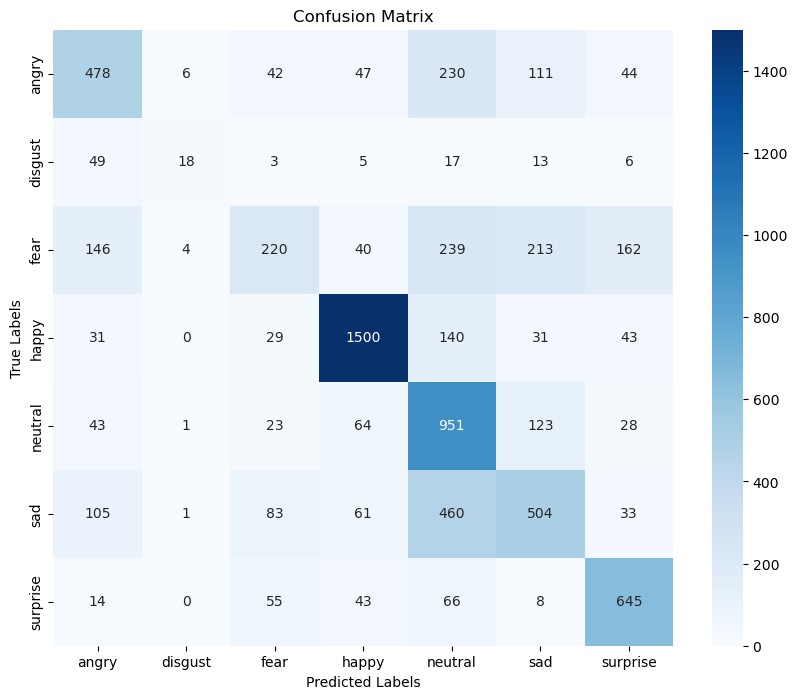

              precision    recall  f1-score   support

       angry       0.55      0.50      0.52       958
     disgust       0.60      0.16      0.26       111
        fear       0.48      0.21      0.30      1024
       happy       0.85      0.85      0.85      1774
     neutral       0.45      0.77      0.57      1233
         sad       0.50      0.40      0.45      1247
    surprise       0.67      0.78      0.72       831

    accuracy                           0.60      7178
   macro avg       0.59      0.52      0.52      7178
weighted avg       0.61      0.60      0.59      7178



In [45]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
test_dir = r'C:\Users\dsilv\development\Emotion Detection\data\test'
model_path = r'C:\Users\dsilv\development\Emotion\cnn_emotion_detection.h5'

# Load the pretrained model
model = load_model(model_path)

# Prepare the test data
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),  # Set to the input size your model expects
    color_mode="grayscale",  # If your model uses grayscale images
    batch_size=32,
    class_mode='categorical',  # Assuming the model uses categorical output
    shuffle=False  # Ensure predictions match file order for confusion matrix
)

# Predict the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
